In [3]:
# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import consensus_score

In [13]:
import pandas as pd

In [14]:
data = {'qtde_ativos':     [20,30,1,0,15],
        'qtde_resolvidos': [0,1,30,215,0],
        'dias_ativo':      [1520,10,120,365,25]}

In [17]:
data_pd = pd.DataFrame(data)

In [18]:
data_pd

,qtde_ativos,qtde_resolvidos,dias_ativo
0,20,0,1520
1,30,1,10
2,1,30,120
3,0,215,365
4,15,0,25


In [34]:
data_pd.nunique()

qtde_ativos        5
qtde_resolvidos    4
dias_ativo         5
dtype: int64

In [26]:
model = SpectralBiclustering()

In [27]:
model.fit(data_pd)

SpectralBiclustering(init='k-means++', method='bistochastic',
           mini_batch=False, n_best=3, n_clusters=3, n_components=6,
           n_init=10, n_jobs=None, n_svd_vecs=None, random_state=None,
           svd_method='randomized')

In [29]:
data = data_pd.values

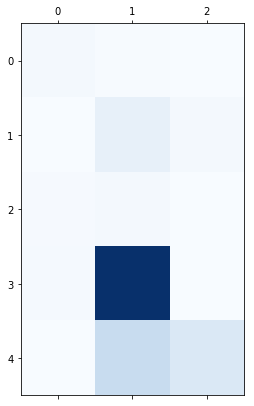

In [31]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)

In [33]:
np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]], dtype=int32)

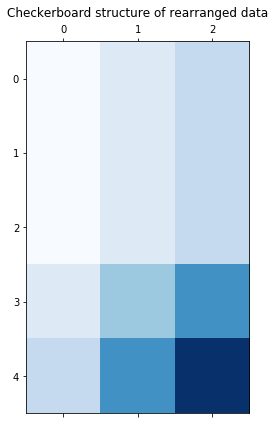

In [32]:
plt.matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1),
            cmap=plt.cm.Blues)
plt.title("Checkerboard structure of rearranged data")

plt.show()

In [5]:
n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10,
    shuffle=False, random_state=0)

Text(0.5, 1.05, 'Original dataset')

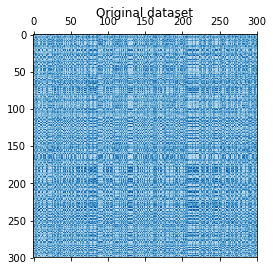

In [9]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

Text(0.5, 1.05, 'Shuffled dataset')

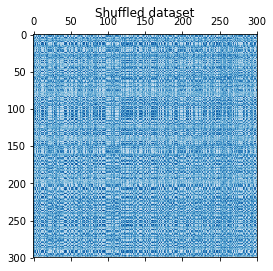

In [10]:
data, row_idx, col_idx = sg._shuffle(data, random_state=0)
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

consensus score: 0.1


Text(0.5, 1.05, 'After biclustering; rearranged to show biclusters')

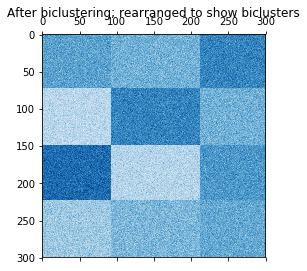

In [11]:
model = SpectralBiclustering(n_clusters=n_clusters, method='log',
                             random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.1f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

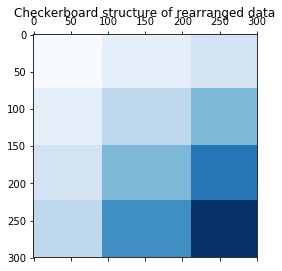

In [12]:
plt.matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1),
            cmap=plt.cm.Blues)
plt.title("Checkerboard structure of rearranged data")

plt.show()